<h1>Parte 1</h1>

<h4>Escribir un programa de computador que simule una marcha aleatoria (en una, dos o tres dimensiones, como prefiera) de N pasos en donde N sea un parámetro que se entra en el computador. El programa debe dar la posición r después de los N pasos. Para N fijo pero grande correr el programa un número importante de veces para poder construir un histograma (posición final en función del número de veces que se repite) y comparar con la ley de probabilidad predicha por el teorema central límite</h4>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
def randomWalk1D(N):
    """
    Funcion para hacer una caminata aleatoria en una dimension con igual probabilidad de moverse en cualquier dirección
    N = Número de pasos
    """
    position = 0
    for i in range(0,N):
        R = np.random.randint(2)
        if(R == 1):
            position+=1
        else:
            position-=1
    return position
        


In [9]:
#N es el número de pasos de la randomWalk
#shape=400 es el número de veces que se va a correr la randomWalk (puede cambiar el dato)

N = int(input("Ingrese el numero de pasos N"))

Histograma = np.zeros(shape=400)
print("Se ha escogido N = ", N)
for i in range(0, Histograma.size):
    print(i)
    Histograma[i] = randomWalk1D(N)

mean, var = norm.fit(Histograma)

Se ha escogido N =  100000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270

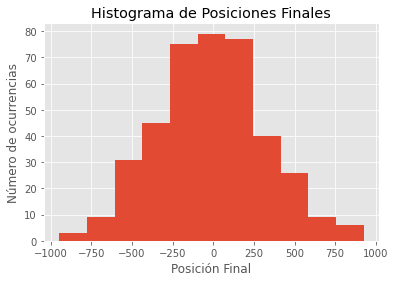

In [16]:
#Para imprimir el histograma:
plt.style.use('ggplot')
nn, bins, patches = plt.hist(Histograma,bins=(11))
#print(np.arange(np.amin(Histograma), np.amax(Histograma), Histograma.size))
#l= plt.plot(np.linspace(np.amin(Histograma), np.amax(Histograma), Histograma.size), norm.pdf(Histograma), linewidth=2)

plt.title("Histograma de Posiciones Finales")
plt.xlabel("Posición Final")
plt.ylabel("Número de ocurrencias")
plt.show()

-15.68 327.2348355539184


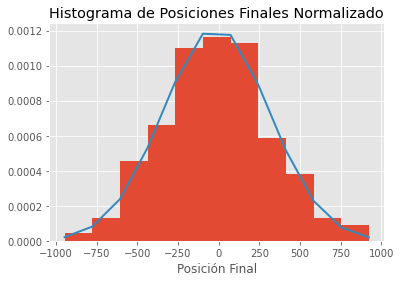

In [19]:
print(mean, var)
plt.hist(Histograma, density=True, bins=11)
plt.title("Histograma de Posiciones Finales Normalizado")
plt.xlabel("Posición Final")
plt.plot(np.linspace(np.amin(Histograma), np.amax(Histograma), bins.size), norm.pdf(bins, mean, var), linewidth=2)

<h1>Parte 2</h1>
<h5>Para varios valores de N correr el programa muchas veces y calcular para cada N el promedio ⟨r⟩ y ⟨r^2⟩. 
Verificar que ⟨r^2⟩ es proporcional a N y determinar numéricamente la constante de difusión.</h5>

In [12]:
def probLaw(x,N):
    """Ley de probabilidad Gaussiana en términos de x y de NA"""
    root = 1/(np.sqrt(2 * np.pi * (N/4)))
    expo = np.exp(-(0.5*x)**2/(N/2))
    return root*expo

Para N = 100


In [13]:
Histograma100 = np.zeros(shape=400)
print("Se ha escogido N = ", 100)
for i in range(0, Histograma100.size):
    #print(i)
    Histograma100[i] = randomWalk1D(100)

#Promedio de las posiciones r
promedio = np.abs(np.average(Histograma100))
print( "Promedio de las posiciones r = ", promedio)

#Valor esperado de las posiciones r dada la ley de probabilidad
suma = 0
for i in Histograma100:
    suma += probLaw(i,N=100)
promedio = suma/100
print("Valor esperado de las posiciones r dada la ley de probabilidad = ", promedio)

#Valor esperado del cuadrado de la posicion r dada la ley de probabilidad
suma = 0
for i in Histograma100:
    suma += probLaw(x=(i**2),N=100)
promedio = suma/100
print("Valor esperado del cuadrado de la posicion r dada la ley de probabilidad = ", promedio)

Se ha escogido N =  100
Promedio de las posiciones r =  0.16
Valor esperado de las posiciones r dada la ley de probabilidad =  0.22739534529480626
Valor esperado del cuadrado de la posicion r dada la ley de probabilidad =  0.08267853950690553


Para N = 1000


In [14]:
Histograma1000 = np.zeros(shape=400)
print("Se ha escogido N = ", 1000)
for i in range(0, Histograma1000.size):
    #print(i)
    Histograma1000[i] = randomWalk1D(1000)

#Promedio de las posiciones r
promedio = np.abs(np.average(Histograma1000))
print( "Promedio de las posiciones r = ", promedio)

#Valor esperado de las posiciones r dada la ley de probabilidad
suma = 0
for i in Histograma1000:
    suma += probLaw(i,N=1000)
promedio = suma/1000
print("Valor esperado de las posiciones r dada la ley de probabilidad = ", promedio)

#Valor esperado del cuadrado de la posicion r dada la ley de probabilidad
suma = 0
for i in Histograma1000:
    suma += probLaw(x=(i**2),N=1000)
promedio = suma/1000
print("Valor esperado del cuadrado de la posicion r dada la ley de probabilidad = ", promedio)

Se ha escogido N =  1000
Promedio de las posiciones r =  1.265
Valor esperado de las posiciones r dada la ley de probabilidad =  0.007344783042626657
Valor esperado del cuadrado de la posicion r dada la ley de probabilidad =  0.00157316676827788


In [15]:
Histograma10000 = np.zeros(shape=400)
print("Se ha escogido N = ", 10000)
for i in range(0, Histograma10000.size):
    #print(i)
    Histograma10000[i] = randomWalk1D(10000)

#Promedio de las posiciones r
promedio = np.abs(np.average(Histograma10000))
print( "Promedio de las posiciones r = ", promedio)

#Valor esperado de las posiciones r dada la ley de probabilidad
suma = 0
for i in Histograma10000:
    suma += probLaw(i,N=10000)
promedio = suma/10000
print("Valor esperado de las posiciones r dada la ley de probabilidad = ", promedio)

#Valor esperado del cuadrado de la posicion r dada la ley de probabilidad
suma = 0
for i in Histograma10000:
    suma += probLaw(x=(i**2),N=10000)
promedio = suma/10000
print("Valor esperado del cuadrado de la posicion r dada la ley de probabilidad = ", promedio)

Se ha escogido N =  10000
Promedio de las posiciones r =  8.67
Valor esperado de las posiciones r dada la ley de probabilidad =  0.00022174106889664508
Valor esperado del cuadrado de la posicion r dada la ley de probabilidad =  2.7491549694408496e-05
